# Проверка статистических гипотез

**Статистическая гипотеза** — это некоторое предположение о свойствах генеральной совокупности, которое необходимо проверить. 


**Проверка статистических гипотез** – это процедура проверки действительны ли результаты, полученные на выборке, и для генеральной совокупности.


**Ошибка первого рода** — ситуация, когда отвергнута правильная нулевая гипотеза (англ. type I errors, α errors, false positive, ошибочное отвержение).
**Ошибка второго рода** — ситуация, когда принята неправильная нулевая гипотеза (англ. type II errors, β errors, false negative, ошибочное принятие). Величина 1 – β называется мощностью критерия.

<img width = '300px' src="images/errors_.jpg">

**Уровень значимости** — допустимая для данной задачи вероятность ошибки первого рода (ложноположительного решения, false positive), то есть вероятность отклонить нулевую гипотезу, когда на самом деле она верна.

<img width = '600px' src="images/errors_plot.png">

Вопрос: почему бы не установить уровень alpha крайне маленьким? Хочется совершать ошибку первого рода крайне мало!

Ответ: если установить alpha ничтожно малым - возрастут ошибки второго рода.

При выборе уровня значимости α исследователь исходит из практических соображений, отвечая на вопрос: какую вероятность ошибки он считает допустимой для его конкретной задачи? Обычно считают достаточным α= 0,05 (5%), иногда α=0,01, редко α=0,001.

**Виды альтернативных гипотез**

Различают односторонние альтернативы: правосторонняя либо левосторонняя -  в данном случае ошибку первого рода переносят на один из хвостов и двустороннюю альтернативу – когда нет уверенности в направлении различий. 

При этом стоит помнить, что ни в коем случае нельзя выбирать тот или иной критерий после проведения эксперимента на основе анализа экспериментальных данных, поскольку это может привести к неверным выводам.


<img width = '300px' src="images/althyp.png">

**Процедура проверки гипотез обычно проводится по следующей схеме:**
1. формулируются гипотезы Н0 и Н1;
2. фиксируется уровень значимости критерия α;
3. выбирается статистический критерий для проверки гипотезы, данный критерий имеет известное стандартное распределение (нормальное, Т-распределение Стьюдента, Фишера и т.п.);
4. по выборочным данным вычисляется значение K-наблюдаемое по распределению выбранной статистики;
5. с учетом выбранного уровня значимости вычисляется критическая область и область принятия гипотезы, то есть находится K-критическое;
6. найденное значение K-наблюдаемое критерия сравнивается с K-критическое и по результатам сравнения делается вывод.


<img width = '800px' src="images/example_hyp_test.png">

### Однофакторный дисперсионный анализ

**Задача**

Работаем операционным директором в курьерской службе. Курьеры передвигаются на электроскутерах, велосипедах и самокатах. Нам нужно понять, стоит ли пересаживать всех курьеров на один вид транспорта, то есть отличается ли в среднем скорость доставки **хотя бы у одного** транспортного средства **от других**.

Статистическая формулировка:
все ли выборки по разным транспортным средствам из одного (схожего) распредления ЛИБО какова вероятность получить такие различия в группах, которые будут найдены извлекая случайные выборки из генеральной совокупности?

Допустив, что курьеры на разных транспортных средствах передвигаются с одинаковой скоростью (при реальном эксперименте мы этого не знаем, также мы не знаем, как будет выглядеть генеральная совокупность), то есть все скорости доставки взяты из одной генеральной совокупности.  

Сгенерируем теоретическую генеральную совокупность.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import scipy
import tqdm
from scipy import stats
import random

from IPython.display import *

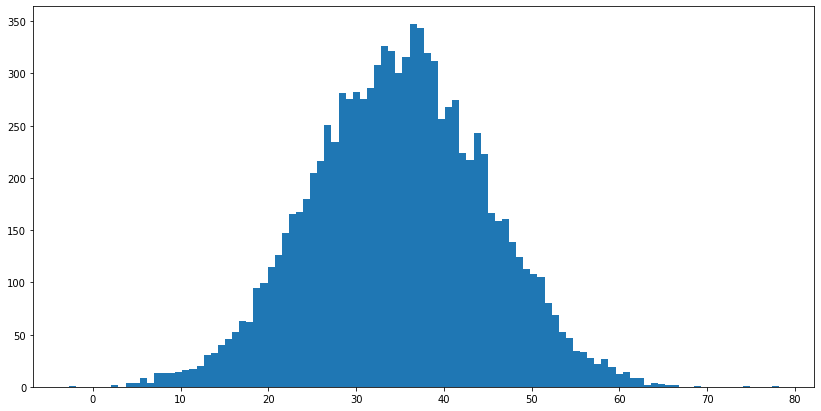

In [466]:
distrib = stats.norm(loc = 35, scale = 10)
gen_pop = distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 100)
plt.show()

Извлечем из нашей совокупности 3 случайные подгруппы по 50 заказов в каждой - пусть это будут наблюдения, полученные в реальном эксперименте.

In [467]:
np.random.seed(3106)
sample_groups = []
for i in range(3):
    sample_groups.append(np.random.choice(gen_pop, size = 50).astype(int))
sample_groups = np.array(sample_groups)
sample_groups

array([[25, 33, 43, 36, 26, 46, 40, 38, 45, 19, 36, 25, 20, 16, 37, 32,
        18, 22, 46, 41, 50, 39, 54, 42, 26, 44, 29, 30, 36, 26, 25, 20,
        35, 41, 40, 31, 32, 27, 28, 50, 25, 44, 43, 45, 27, 38, 31, 27,
        30, 21],
       [48, 41, 43,  9, 16, 37, 29, 25, 21, 59, 35, 36, 38, 37, 21, 25,
        32, 34, 36, 25, 16, 25, 28, 38, 48, 45, 44, 31, 23, 23, 24, 16,
        22, 22, 27, 27, 37, 39, 37, 41, 24, 29, 49, 30, 34, 33, 39, 45,
        23, 34],
       [33, 45, 40, 51, 28, 41, 25, 35, 22, 55, 44, 28, 42, 36, 24, 32,
        38, 41, 34, 25, 27, 39, 31, 22, 41, 37, 34, 34, 41, 24, 37, 30,
        36, 35, 46, 26, 37, 28, 51, 39, 31, 48, 31, 29, 41, 50, 33, 41,
        31, 31]])

Рассчитаем:
- среднее каждой выборки и стандартное отклонение (голубые линии на графике)
- среднее средних и стандартное отклонение средних (оранжевая линия на графике)

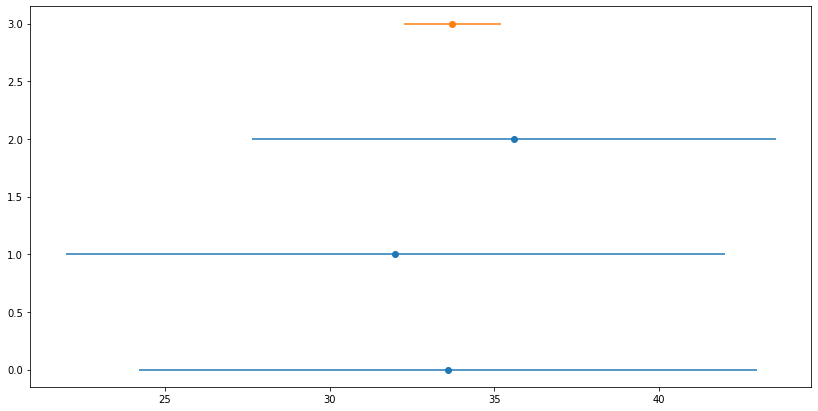

In [468]:
x = np.mean(sample_groups,axis = 1)
y = np.arange(sample_groups.shape[0])
e = np.std(sample_groups,axis = 1)

fig = plt.figure(figsize=(14, 7))
plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')
plt.errorbar( np.mean(x), y.shape[0] ,xerr =  np.std(x), linestyle='None', marker='o')

plt.show()

**1)	формулируются гипотезы Н0 и Н1;**


H0 - выборки взяты из одного распределения (средние всех выборок равны)

H1 - выборки взяты из разных распределений (хотя бы пара средних различается между собой)

**2)	фиксируется уровень значимости критерия значимости**

Зададим α на уровне значимости 5%.

**3)выбирается статистический критерий для проверки гипотезы;**

Однофакторный дисперсонный анализ проверяет, что чем больше разброс средних (стандартное отклонение среднего средних) и чем меньше разброс значений внутри групп (стандартные отклонения средних), тем меньше вероятность того, что наши группы — это случайные выборки из одной совокупности.

Критерий F (Фишера) передает вышеназванную идею:

 $ \Large F =   \frac{S^2меж.} {S^2внутр.} = \frac{\frac{SSB} {m-1}} {\frac{SSW} {N - m}} $

$ SSB - \text{межгрупповая изменчивость}, $ 
$ SSW - \text{внутригрупповая изменчивость}$ 

$m - \text{кол-во групп}, $
$N - \text{число наблюдений} $

При большем значении критерия F: дисперсия между средними групп больше, чем внутригрупповая дисперсия - означает, что выборки взяты не из одного распределения.

Обобщая, формула большинства статистических критериев можно представить в следюущем виде: 

$ \Large \frac{\text{СИГНАЛ}} {\text{ШУМ}}$

Также критерий Фишера в числителе рассчитывает дисперсию среди средних (то есть значение, на основе которого мы можем принять решение о разнице распределенией), в знаменателе нормализуя на разброс данных в каждой из групп.

**4) по выборочным данным вычисляется значение K-наблюдаемое по распределению выбранной статистики**

In [469]:
num_of_groups = sample_groups.shape[0]

In [481]:
#Рассчитаем среднее по всем наблюдениям:
X_mean = sample_groups.mean()
X_mean

33.733333333333334

In [484]:
# Рассчитаем среднее для каждой группы
group_means = sample_groups.mean(axis = 1)
group_means_reshaped = group_means.reshape(num_of_groups, 1)

In [485]:
# SSW
SSW  = np.sum((sample_groups  - group_means_reshaped)**2)
SSW

12584.0

In [486]:
# SSB
group_lengths = [x.shape[0] for x in sample_groups]

SSB  = np.sum((group_means - X_mean)**2 * group_lengths)
SSB

325.3333333333336

In [491]:
# F
m = num_of_groups
N = np.sum(group_lengths)

F = (SSB/(m-1))/(SSW/(N-m))
F

1.900190718372538

Воспользуемся пакетом stats для аналогичного расчета:

In [488]:
F, p = stats.f_oneway(*sample_groups)

In [480]:
# F-наблюдаемое
F

1.900190718372537

**5)	с учетом выбранного уровня значимости вычисляется критическая область и область принятия гипотезы, то есть находится K-критическое**

In [522]:
# F-критическое
F_critical = scipy.stats.f.ppf(q=1-.05, dfn = m, dfd = N - m)
F_critical

2.6661487758521765

**6)	найденное значение K-наблюдаемое критерия сравнивается с K-критическое и по результатам сравнения делается вывод**

In [500]:
F < F_critical

True

**Вывод**: Мы не можем отвергнуть гипотезу H0

**P-значение** упрощает проверку гипотез, нет необходимости искать критическое значение.

**p** - вероятность ошибочно отвергнуть верную нулевую гипотезу, то есть найти различия там, где их нет. Также p-значение называют достигаемым уровнем значимости.

Это вероятность получить такие или более выраженные различия при условии, что между группами никаких различий на самом деле нет. Иными словами, это вероятность получить такие или еще более сильные различия между нашими группами, при условии, что, на самом деле, все передвигаются с одинаковой скоростью, то есть взяты из одного распределения.

In [501]:
p

0.15319505983888268

In [502]:
p > 0.05

True

Теперь давайте попробуем разобраться, откуда взялось распределение F, с которым мы работали.

Будем из нашей генеральной совокупности извлекать выборки и считать F. Выборки будут также размером 50 и количество выборок будет равно 3, то есть по аналогии с тем же дизайном эксперимента, который мы проводили выше.

In [509]:
def calculate_random_sample_group(sz = 50):
    sample_groups = []
    for i in range(num_of_groups):
        sample_groups.append(np.random.choice(gen_pop,  size = sz))
    F, _ = stats.f_oneway(*sample_groups)    
    return sample_groups, F

Fs = []
sgs = []
for i in tqdm.notebook.tqdm(range(10000)):
    sg,F = calculate_random_sample_group()
    Fs.append(F)
    sgs.append(sg)

  0%|          | 0/10000 [00:00<?, ?it/s]

Распределение приняло опредленную форму, такое распредление называется распредление Фишера, на основе рассчитанных статистик по нему мы как раз и принимали решения.

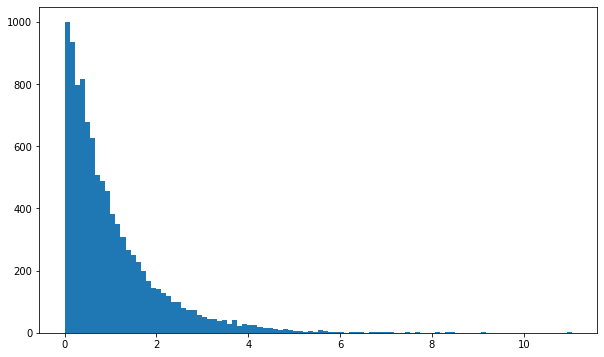

In [510]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Fs,bins = 100)
plt.show()

### Классификация критериев

1. **Параметрические критерии** - включают расчет параметров конкретного распределения (t-критерий Стьюдента, F-критерий Фишера)
2. **Непараметрические критерии** - не связаны с конкретным распределением (критерий Манна-Уитни и критерий Вилкоксона)
3. **Критерии согласия** - проверяется гипотеза о виде неизвестного закона распределения (критерий Шапиро-Уилки, критерий хи-квадрат, критерий Колмогорова-Смирнова)


Параметрические и непараметрические критерии также подразделяются на:
- *одновыборочные* - проверяют гипотезы относительно ОДНОЙ выборки
- *двувыборочные со связанными выборками* - элементы выборок являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов
- *двувыборочные с несвязанными выборками* - элементы выборок НЕ являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов


### Схема по работе со статистическими критериями

<img width = '1200px' src="images/scheme.png">

### 1. Параметрические критерии для оценки среднего

#### Одновыборочный критерий с большим числом наблюдений 

Наблюдаем: $X_1, X_2, …, X_n$

Предполагаем: $X_i$  независимы и одинаково распределены (не обязательно нормально), количество наблюдений n велико

Проверяемая гипотеза: $H_{0} : \mu = \mu_{0} , H_{1} : \mu <> \mu_{0} $ 

**Статистика:** $  \large Z = \frac{\bar {X} - \mu}{ \frac{S}{\sqrt{n}}  } $ ~  $N(0,1)$ при верной $H_0$

Такой критерий называют асимптотический, так как использует ЦПТ.

#### Одновыборочный критерий с малым числом наблюдений  и известной дисперсией

Наблюдаем: $X_1, X_2, …, X_n$, известна $\large \sigma^2$

Предполагаем: $X_i$  независимы и одинаково **нормально** распределены, небольшое число наблюдений n

Проверяемая гипотеза: $H_{0} : \mu = \mu_{0} , H_{1} : \mu <> \mu_{0} $ 

**Статистика:** $  \large Z = \frac{\bar {X} - \mu}{\frac{\sigma}{\sqrt{n}}} $ ~  $N(0,1)$ при верной $H_0$

#### Одновыборочный критерий с малым числом наблюдений и неизвестной дисперсией - критерий Стьюдента 

Наблюдаем: $X_1, X_2, …, X_n;$

Предполагаем: $X_i$  независимы и одинаково **нормально** распределены, небольшое число наблюдений n

Проверяемая гипотеза: $H_{0} : \mu = \mu_{0} , H_{1} : \mu <> \mu_{0} $ 

**Статистика:** $  \large t = \frac{\bar {X} - \mu}{\frac{S}{\sqrt{n}} } $ ~  $t$ при верной $H_0$


In [662]:
sample = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
popmean = 37.
alternative= 'two-sided'

# a - выборка данных
# popmean - среднее, с которым хотим сравнить гипотезу
# alternative - вид альтернативной гипотезы

stats.ttest_1samp(sample, popmean, alternative = alternative)

Ttest_1sampResult(statistic=-1.7634163815266284, pvalue=0.0883655567095017)

При работе с данным критерием, чтобы убедиться, что выборка принадлежит к нормальному распределению используется один из критериев согласия.

#### Проверка распределений на нормальность

Чаще всего используют следующие способы проверки распределений на нормальность:
- визуальная оценка с помощью графика Q-Q графика
- статистический критерий Шапиро-Уилко
- статистический критерий Колмогорова-Смирнова
- и т.д.

У каждого критерия есть свои особенности и ограничения в применении.

**Пример построения Q-Q графика**

In [553]:
d = stats.lognorm(0.5, loc = 25, scale = 10)
sample_1 = d.rvs(size=300)

d = stats.norm(loc = 25, scale = 10)
sample_2 = d.rvs(size=300)

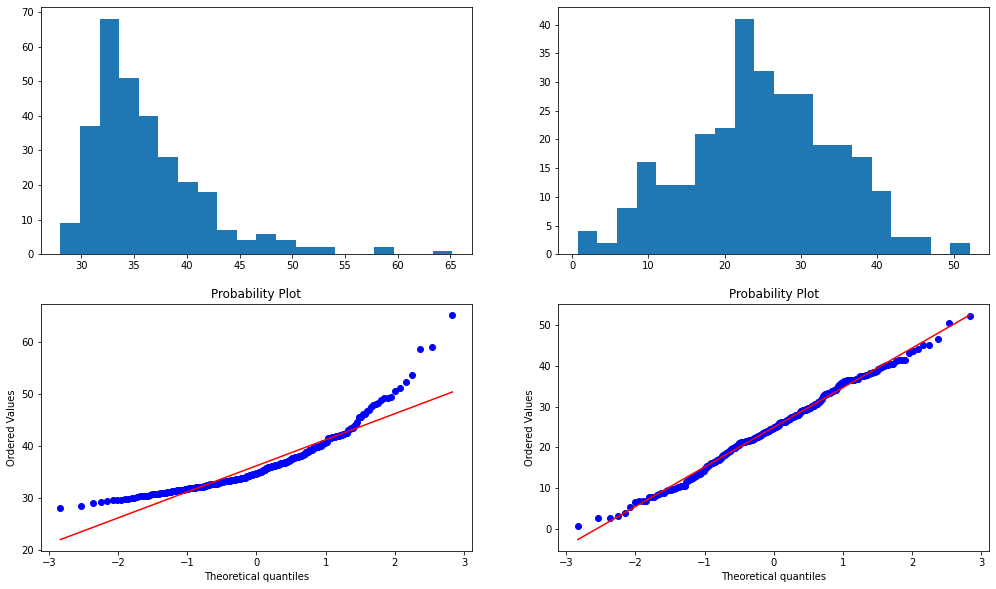

In [569]:
fig = plt.figure(figsize= (17,10))
ax1 = fig.add_subplot(221)
plt.hist(sample_1, bins = 20)
ax2 = fig.add_subplot(222) 
plt.hist(sample_2, bins = 20)
ax3 = fig.add_subplot(223)
stats.probplot(sample_1, dist = "norm", plot = plt)
ax3 = fig.add_subplot(224)
stats.probplot(sample_2, dist = "norm", plot = plt)
plt.show()

Точки выборки с нормальным распределением лежат на прямой.

Как строится:

1. берём 0.01-квантиль теоретического (с которым сравниваем) распределения, например нормального -- это $x_1$(≈-2.33 для нормального). 
2. берём 0.01-квантиль нашей выборки - это $y_1$. Рисуем на графике точку ($x_1,y_1$). 
3. берём 0.02-квантиль теоретического распределения - это $x_2$, и 0.02-квантиль выборки - это $y_2$. Опять рисуем на графике точку ($x_2,y_2$).
4. и т.д.

Естественно, рисовать точки можно с любым шагом, не только 0.01.

**Применение критерия Шапиро-Уилко**

Критерий Шапиро-Уилка **W** используется для определения нормальности. Если **W** статистика значима, то гипотеза о нормальном распределении значений переменной отвергается. 

In [577]:
d = stats.lognorm(0.5, loc = 25, scale = 10)
sample_1 = d.rvs(size=35)

d = stats.norm(loc = 25, scale = 10)
sample_2 = d.rvs(size=30)

In [578]:
stats.shapiro(sample_1)

ShapiroResult(statistic=0.8840447068214417, pvalue=0.0015135323628783226)

In [579]:
stats.shapiro(sample_2)

ShapiroResult(statistic=0.965752899646759, pvalue=0.43037518858909607)

В первом случае нулевая гипотеза о нормальном распределении данных отвергается в пользу альтернативны, во втором случае принимается нулевая гипотеза ( p > 0.05), при заданном уровне значимости равным 5%.

Данный критерий применяется для выборок размером до 50 наблюдений.

**Задача**

Средняя сессия посетителя игрового компьютерного клуба составляет 90 минут. Владелец клуба хочет увеличить время игровых сессий, потому что так он сможет получить больше выручки, решая заменить старые компьютеры на новые. В итоге, в течение следующих дней игроки проводят 20 сессий средней длинной 102 минуты со стандартным отклонением 15 минут. 

Необходимо понять, увеличилось ли время сессии за счет того, что владелец клуба заменил компьютеры?

**Решение задачи**

1. Имеем дело с **одновыборочным** критерием, так как у нас только одна группа пользователей, над которыми проводился эксперимент.
2. Данных немного (n = 20), поэтому не можем воспользоваться при расчете Z-критерием.
3. Не имея возможности оценить выборку (данных к задаче просто не прилагается) можно сделать предположение о том, что данные в выборке 20 игровых сессий пользователей распределены нормально.

4. Проверяемая гипотеза: $H_{0} : \mu $ = 90 минут , $H_{1} : \mu > 90$ минут 

Стоит сразу обратить внимание, что будем проверять одностороннюю гипотезу, то есть хотим оценить именно эффект улучшения.

5. Установим уровень значимости критерия α = 5%.
6. С учетом предположения о нормальности данных для расчета будем использовать критерий Стьюдента.


In [594]:
sample_mean = 102
mu = 90
n = 20
sample_std = 15

In [597]:
t = (sample_mean - mu) / (sample_std/np.sqrt(n))

7. Рассчитаем t-критическое, обратим внимание, что в данном случае проверяем именно односторонюю гипотезу (в случае двухсторонней гипотезы на концах распределения приходилась бы вероятностная масса $\large \frac{\alpha}{2}$).

In [601]:
t_crit = stats.t.ppf(1-0.05, n)
t_crit

1.7247182429207857

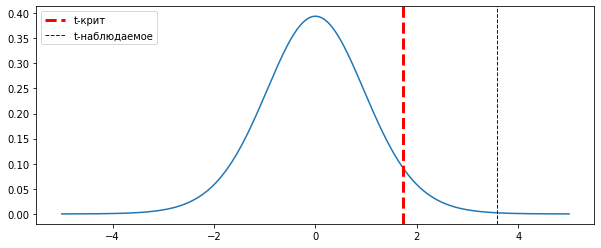

In [629]:
fig = plt.figure(figsize= (10,4))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs, n - 1))
plt.axvline(t_crit, color='red', linestyle='dashed', linewidth=3, label = 't-крит')
plt.axvline(t, color='blue', linestyle='dashed', linewidth=1,label = 't-наблюдаемое')
plt.legend()
plt.show()

8. Вывод: на уровне значимости $\alpha$ отвергаем нулевую гипотезу о невлиянии новых компьютеров на длину сессии в пользу альтернативной.

#### Двувыборочный критерий с большим числом наблюдений

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$  независимы и одинаково распределены (не обязательно нормально), $Y_i$  независимы и одинаково распределены (не обязательно нормально),количество наблюдений $n_x$, $n_y$ велико. Все величины независимы.;

Проверяемая гипотеза: $H_{0} : \mu_x = \mu_y , H_{1} : \mu_x <> \mu_y $ 

**Статистика:** $  \large Z  = \frac{\overline{X}-\overline{Y}}
{ \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} } } $ 
~  $N(0,1)$ при верной $H_0$

Опять же, как и при одновыборочном критерии, такие выводы мы можем сделать исходя из ЦПТ.

#### Двувыборочные критерии с малым числом наблюдений

При работе с небольшим числом наблюдений мы не можем воспользоваться асимптотическим еритерием, работаем с так называемыми точными критериями, которые делают предположение исходя уже из самого распределения.

Возможны три ситуации:
1. известны дисперсии генеральной совокупности у обеих выборок, тогда:

**Статистика:** $  \large Z  = \frac{\overline{X}-\overline{Y}}
{ \sqrt{ \frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y} } } $ 
~  $N(0,1)$ при верной $H_0$


2. неизвестны дисперсии генеральной совокупности, известно только, что они равны, тогда:

**Статистика:** $  \large t  = \frac{\overline{X}-\overline{Y}}
{ \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} } } $ 
~  $t(n_x + n_y - 2)$ при верной $H_0$

3. неизвестны дисперсии генеральной совокупности, также оцениваемые выборки могут быть неравны по размеру, тогда:

**Статистика:** $  \large W  = \frac{\overline{X}-\overline{Y}}
{ \sqrt{ \frac{S^2_x}{n_x} + \frac{S^2_y}{n_y} } } $ 
~  $t(d)$ при верной $H_0$ - распределение Уэлча

$ d = \large \frac{(\frac{S^2_x}{n_x} + \frac{S^2_y}{n_y})^2} 
{\frac{S^4_x}{n_x^2(n_x - 1)} + \frac{S^4_y}{n_y^2(n_y - 1)} }$


Рассмотренные тесты требуют **нормальное** распределение данных в выборках.

Посмотрим, как можно рассчитывать статистики с помощью Python: 

In [696]:
sample_1 = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_2 = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]
alternative= 'two-sided'

In [698]:
#Z - test
from statsmodels.stats.weightstats import ztest as ztest
ztest(sample_1, sample_2,alternative = alternative)

(-2.246647443814713, 0.024662567532965064)

In [700]:
# t-test
stats.ttest_ind(sample_1, sample_2, alternative = alternative)

Ttest_indResult(statistic=-2.246647443814713, pvalue=0.028484307153437534)

In [706]:
# W-test
stats.ttest_ind(sample_1, sample_2, alternative = alternative, equal_var = False)

Ttest_indResult(statistic=-2.2466474438147124, pvalue=0.028761118010498955)

In [707]:
from sklearn import datasets
iris = datasets.load_iris()

**Задача**

Даны две выборки со средними оценками пользователей фильмов с двух разных кинопорталов. Необходимо проверить гипотезу о том, что пользователи второго кинопортала более консервативны в оценивании фильмов. 

In [722]:
ratings_1 = [
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
             3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

ratings_2 = [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ]

**Решение задачи**

1. Имеем дело с **двувыборочным** критерием, так как у нас две группы пользователей, над которыми проводился эксперимент.
2. Выборки разные, при этом мы ничего не знаем про дисперсии генеральной совокупности, воспользуемся тестом Уэлча.
3. Тест Уэлча требует нормальности распределения данных в обеих выборках

In [723]:
stats.shapiro(ratings_1)

ShapiroResult(statistic=0.969359278678894, pvalue=0.11201612651348114)

In [724]:
stats.shapiro(ratings_2)

ShapiroResult(statistic=0.9849170446395874, pvalue=0.10113201290369034)

В обеих выборках не отвергается гипотеза о нормальности.

4. Проверяемая гипотеза: $H_{0} : \mu_1 $ = $\mu_2$ , $H_{1} : \mu_1 $ > $\mu_2$ 

Будем проверять одностороннюю гипотезу.

5. Установим уровень значимости критерия α = 5%.
6. Рассчитаем критерий Уэлча


In [730]:
stats.ttest_ind(ratings_1, ratings_2, alternative = 'greater', equal_var = False)

Ttest_indResult(statistic=13.468527025019432, pvalue=8.548194524244958e-22)

7. Вывод: на уровне значимости $\alpha$ отвергаем нулевую гипотезу об одинаковых средних в обеих выборках кинолюбителей в пользу альтернативной: пользователи, сидящие на втором кинопортале более консервативны в своих оценках.

#### Связанные критерии с малым числом наблюдений

**Связанные выборки (зависимые, парные)** - каждое наблюдение одной выборки неразрывно связано (находится в паре) с одним из наблюдений другой выборки.

<img width = '400px' src="images/pp.png">

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}}$ 

Предполагаем: $X_i$  и $Y_i$ **зависимы** и нормально распредлены, количество наблюдений $n_x$, $n_y$ одинаково.;

Проверяемая гипотеза: $H_{0} : \mu_x = \mu_y , H_{1} : \mu_x <> \mu_y $ 

**Статистика:** $  \large Z  = \frac{d}
{ \sqrt{ \frac{S^2_d}{n_d} } } $ 
~  $N(0,1)$ при верной $H_0$

d - среднее попарное изменение

In [734]:
sample_1 = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_2 = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]
alternative= 'two-sided'

In [735]:
stats.ttest_rel(sample_1,  sample_2, alternative = alternative)

Ttest_relResult(statistic=-2.726336530171027, pvalue=0.01074988858275567)

#### Бутстрап

Очень много тестов со своей спецификой преминения и ограничениями!

<img width = '300' src="images/book.png">

Есть универсальное решение для проверки гипотез - метод **бутстрап**.

Идея бутстрепа в том, чтобы использовать результаты вычислений по выборкам как "фиктивную популяцию" с целью определить выборочное распределение статистики. Фактически, при этом анализируется большое число "фантомных" выборок, называемых бутстреп-выборками.

Выборки формируются методом "с возращением".

В бутстрепе мы не получаем новой информации, но разумно используем имеющиеся данные, исходя из поставленной задачи.

Например, бутстреп можно использовать для малых выборок, для оценок медианы, корреляций, построения доверительных интервалов и в других ситуациях.

Единственное **ограничение**, что выборка, с которой мы работаем при использовании бутстрепа должна быть похожа схожа с генеральной совокупностью.

<img width = '600' src="images/bootstrap.png">

**Задача**

Разрабатываем алгоритм для высоконагруженной системы. Есть старая версия алгоритма, при этом было подготовлена новая версия алгоритма с использованием современных бибилотек. Нужно оценить 90-перцентиль времени работы алгоритмов, проверив одностороннюю гипотезу о том, что новый алгоритм эффективнее.      

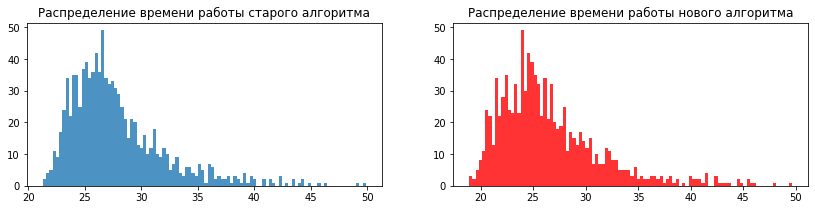

In [810]:
ln_distrib = stats.lognorm(0.5, loc = 20, scale = 7)
old_version = ln_distrib.rvs(size=1000)

ln_distrib = stats.lognorm(0.5, loc = 17, scale = 8.3)
new_version = ln_distrib.rvs(size=1000)

fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version, 100, alpha=0.8)
plt.title('Распределение времени работы старого алгоритма')

ax1 = plt.subplot(122)
plt.hist(new_version, 100, alpha=0.8, color = 'r')
plt.title('Распределение времени работы нового алгоритма')

plt.show()

**Решение задачи**

1. Проверяемая гипотеза: $H_{0} : \mu_1 $ = $\mu_2$ , $H_{1} : \mu_1 $ > $\mu_2$ 

Будем проверять одностороннюю гипотезу.

2. Установим уровень значимости критерия α = 5%.
3. Используем бутстреп.

In [811]:
from sklearn.utils import resample

In [812]:
old_version_90p_boostrap_distribution = []
new_version_90p_boostrap_distribution = []

for i in range(1000):
    sample_old_version = resample(old_version, replace=True, n_samples=100, random_state=i)
    sample_new_version = resample(new_version, replace=True, n_samples=100, random_state=i)
    
    old_version_90p_boostrap_distribution.append(np.percentile(sample_old_version, 90))
    new_version_90p_boostrap_distribution.append(np.percentile(sample_new_version, 90))

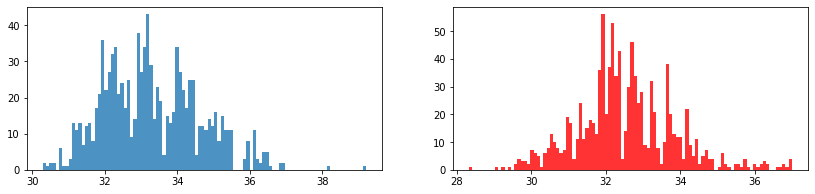

In [813]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version_90p_boostrap_distribution, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(new_version_90p_boostrap_distribution, 100, alpha=0.8, color = 'r')

plt.show()

In [814]:
t, p = stats.ttest_ind(old_version_90p_boostrap_distribution,
                        new_version_90p_boostrap_distribution,
                        alternative='greater')

In [815]:
t

13.292069447962712

In [816]:
p

5.3745482987169623e-39

4. Вывод: отвергаем нулевую гипотезу о равенстве 90 перцентилей времени работы алгоритмов в пользу односторонней альтернативной.

### 2. Оценка долей

#### Одновыборочный критерий с большим числом наблюдений 

Наблюдаем: $X_1, X_2, …, X_n;$

Предполагаем: $X_i$  независимы и имеют распредление Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_{0} : p = p_{0} , H_{1} : p <> p_{0} $ 

**Статистика:** $  \large Z = \frac{p - p_{0}} { \frac{p_0(1 - p_0)}{n}  } $ ~  $N(0,1)$ при верной $H_0$

In [825]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array(100)
nobs = np.array(300)
value = 0.5
proportions_ztest(count, nobs, value = value)

(-6.123724356957946, 9.141298408246598e-10)

#### Двувыборочный критерий с большим числом наблюдений  для зависимых выборок


Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i, Y_i$  **зависимы** и имеют распредление Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_{0} : p_x = p_y , H_{1} : p_x <> p_y $ 

**Статистика:** $  \large Z = \Large \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}} $ ~  $N(0,1)$ при верной $H_0$

<img width = '400px' src="images/img-2022-01-12-19-05-24.png">

#### Двувыборочный критерий с большим числом наблюдений  для независимых выборок

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i, Y_i$  независимы и имеют распредление Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_{0} : p_x = p_y , H_{1} : p_x <> p_y $ 

**Статистика:** $  \large Z = \Large \frac{p_x-p_y} { \sqrt{ \frac{p_x(1-p_x)} {n_x} +  \frac{p_y(1-p_y)} {n_y} } } $ ~  $N(0,1)$ при верной $H_0$

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([100, 400])
nobs = np.array([300, 800])
proportions_ztest(count, nobs, alternative='smaller')

**Задача**

Проводилось CX исследование о положительном опыте использования приложения для доставки еды среди 200 клиентов, после этого клиентам выдали промокод одного из сервисов и через месяц среди этих же клиентов провели повторный опрос. Необходимо проверить гипотезу о том, что промокоды увеличивают положительный опыт от использования доставки.

In [835]:
survey_1 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
survey_2 = [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]

**Решение задачи**

1. Проверяемая гипотеза:  $H_{0} : p_x = p_y , H_{1} : p_x < p_y $ 

Будем проверять одностороннюю гипотезу.

2. Установим уровень значимости критерия α = 5%.

3. Будем использовать критерий для долей для зависимых выборок.

In [842]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    
    if alternative == 'two-sided':
        return z_stat, 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return z_stat, stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return z_stat, 1 - stats.norm.cdf(z_stat)
    
    
proportions_diff_z_test(proportions_diff_z_stat_rel(survey_1,survey_2),'less' )

(5.927489783638191, 0.9999999984619976)

4. Вывод: на уровне значимости $\alpha$ не можем отвергнуть нулевую гипотезу о том, что промокоды влияют на положительный опыт об использовании доставки.

### Качественный признаки

**Качественные признаки** - признаки не связаны между собой никакими арифметическими соотношениями, упорядочить их также нельзя.
Единственный способ описания качественных признаков состоит в том, чтобы подсчитать число объектов, имеющих одно и то же значение. Кроме того, можно подсчитать, какая доля от
общего числа объектов приходится на то или иное значение.

#### Критерий Хи-Квадрат

**Критерий хи-квадрат** — это одни из наиболее распространенных способов изучения связей между двумя и более категориальными переменными. Проведение этого теста включает расчет статистики хи-квадрат и ее сравнение с распределением хи-квадрат, чтобы найти вероятность данного результата критерия. 

Есть несколько типов критерия хи-квадрат:
- критерий независимости хи-квадрат;
- критерий равенства пропорций хи-квадрат;
- критерий согласия хи-квадрат.


Рассмотрим пример расчета критерия независимости хи-квадрат:

In [6]:
from scipy.stats import chi2_contingency

banner_data = pd.DataFrame()
banner_data['clicked'] = [100,400,500]
banner_data['non_clicked'] = [200, 400,600]
banner_data.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data['Total'] = banner_data['clicked'] + banner_data['non_clicked']

banner_data

,clicked,non_clicked,Total
Баннер_A,100,200,300
Баннер_B,400,400,800
Итого,500,600,1100


При работе с критерием хи-квадрат встречается понятие, как таблица ожидаемых значений.

Примем нулевую гипотезу H0, что кликабельность по баннерам A и B одинакова, тогда:

In [8]:
clicked_total = 500/1100
non_clicked_total = 600/1100

Если баннера не влияют на кликабельность, то есть поведение клиентов при посещении сайта должно быть схожим с общим.

In [10]:
banner_A_clicked = clicked_total* 300
banner_B_clicked = clicked_total* 800

banner_A_non_clicked = non_clicked_total* 300
banner_B_non_clicked = non_clicked_total* 800

In [11]:
banner_data_E = pd.DataFrame()
banner_data_E['clicked'] = [banner_A_clicked,banner_B_clicked,500]
banner_data_E['non_clicked'] = [banner_A_non_clicked, banner_B_non_clicked,600]
banner_data_E.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data_E['Total'] = banner_data_E['clicked'] + banner_data_E['non_clicked']
banner_data_E

,clicked,non_clicked,Total
Баннер_A,136.363636,163.636364,300.0
Баннер_B,363.636364,436.363636,800.0
Итого,500.000000,600.000000,1100.0


$ \Large \chi^2  = \sum {   \frac{(O - E)^2} {E}  } $ , O  - наблюдаемое значение, E - ожидаемое значение.

$ \Large \chi^2  = \sum {   \frac{|O - E| - \frac{1} {2}} {E}  } $ (с поправкой Йеитса - только для таблиц 2х2)

In [7]:
chi2, p, dof, ex = chi2_contingency(banner_data.iloc[:2,:2])
chi2,p,dof,ex

(23.776843750000012,
 1.0817608500977008e-06,
 1,
 array([[136.36363636, 163.63636364],
        [363.63636364, 436.36363636]]))

#### Точный критерий Фишера

В случае малого числа наблюдений для проверки гипотез о долях вместо Z-критерия используется точный критерий Фишера. 

<img width = '500px' src="images/fisher_crit.png">

Он основан на переборе всех возможных вариантов заполнения таблицы сопряженности при данной численности групп.

In [844]:
df = pd.DataFrame()
df['active'] = [8,1]
df['non_active'] = [2, 5]
df.index = ['group_1', 'group_2']
df

,active,non_active
group_1,8,2
group_2,1,5


In [845]:
stats.fisher_exact(df)

(20.0, 0.03496503496503495)

Достоинством метода является соответствие полученного критерия точному значению уровня значимости p.